## spacepoints

In [5]:
import pandas as pd
spacepoints_df = pd.read_csv('raw_data/ODD_Single_muon_10k/spacepoints.csv')
spacepoints_df.drop(spacepoints_df.columns[[-1]], axis=1, inplace=True)
spacepoints_df.drop(spacepoints_df.columns.difference(['event_id', 'x', 'y']), axis=1, inplace=True)

import numpy as np
spacepoints = spacepoints_df.to_numpy()

In [41]:
def get_particle_positions(index, points=spacepoints):
    return points[points[:,0] == index][:,np.array([False, True, True])]
get_particle_positions(0)

array([[ -20.76582146,   25.30016327],
       [ -43.03113937,   52.27861786],
       [ -44.05728531,   53.51391602],
       [ -73.08868408,   88.43530273],
       [-108.63674164,  130.78538513],
       [-169.06233215,  201.92532349],
       [-165.28431702,  197.53672791],
       [-233.36782837,  276.31903076],
       [-326.07827759,  381.4654541 ],
       [-432.61160278,  499.20593262],
       [-539.0491333 ,  611.7701416 ],
       [-542.56756592,  617.36779785],
       [-679.98724365,  760.78851318],
       [-684.82879639,  765.56066895]])

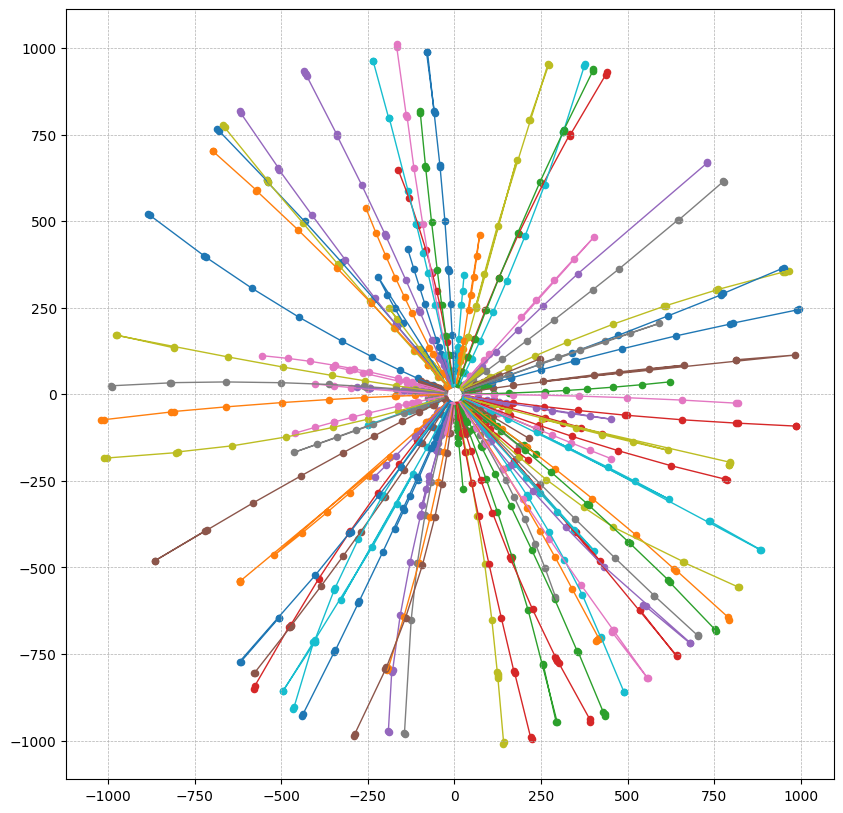

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(100):
    plt.scatter(get_particle_positions(i)[:,0], get_particle_positions(i)[:,1], s=20)
    plt.plot(get_particle_positions(i)[:,0], get_particle_positions(i)[:,1], lw=1)
plt.grid(linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## activations

### 2D

In [114]:
import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 100
def plot_activation_function(func, ylabel, y_ticks_step, radius = 5, bottom_line=None, top_line=None):

    fig, ax = plt.subplots()
    # fig.set_dpi(300)
    
    x = np.arange(-radius, radius, 0.01)
    y = func(x)
    ax.plot(x, y, color='red')
    # ax.scatter(x, y, c=plt.cm.cividis(y/np.max(y)), edgecolor='none', s=5)

    ax.set_xlabel(r'$x$')
    ax.xaxis.set_major_formatter('{x: .1f}')
    x_ticks_step = 2.0
    x_ticks = np.arange(np.min(x), np.max(x)+x_ticks_step, x_ticks_step)
    ax.set_xticks(x_ticks)

    ax.set_ylabel(ylabel)
    ax.yaxis.set_major_formatter('{x: .1f}')
    y_ticks = np.arange(np.floor(np.min(y)), np.max(y)+y_ticks_step, y_ticks_step)
    ax.set_yticks(y_ticks)
    
    if bottom_line is not None:
        bottom_color = 'red' # plt.cm.cividis(0.01) # 'red' 
        ax.axhline(y=bottom_line, color=bottom_color, alpha=0.5, linestyle='--')
        plt.setp(ax.get_yticklabels()[0], color=bottom_color)
    if top_line is not None:
        top_color = 'red' # plt.cm.cividis(0.99) #  
        ax.axhline(y=top_line, color=top_color, alpha=0.5, linestyle='--')
        plt.setp(ax.get_yticklabels()[-1], color=top_color)

    ax.grid(linestyle='--', linewidth=0.5)
    plt.show()

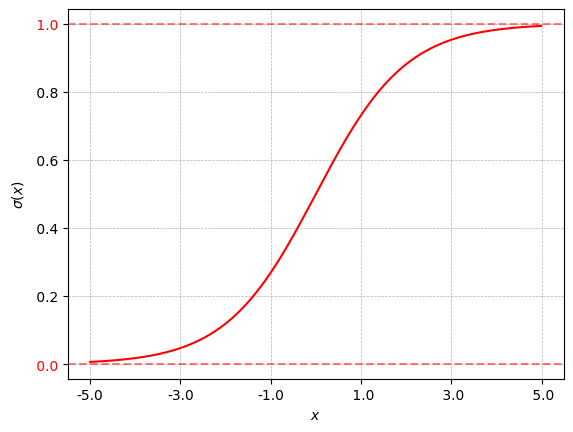

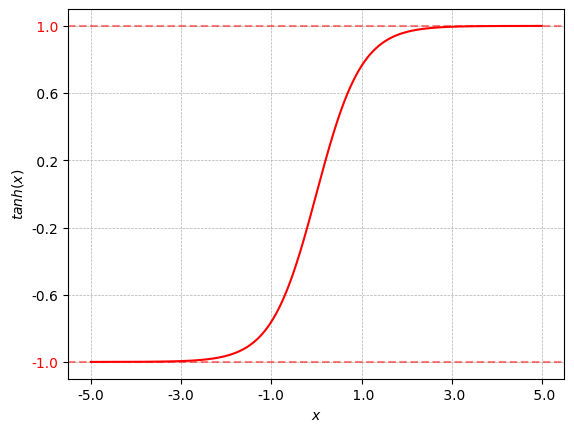

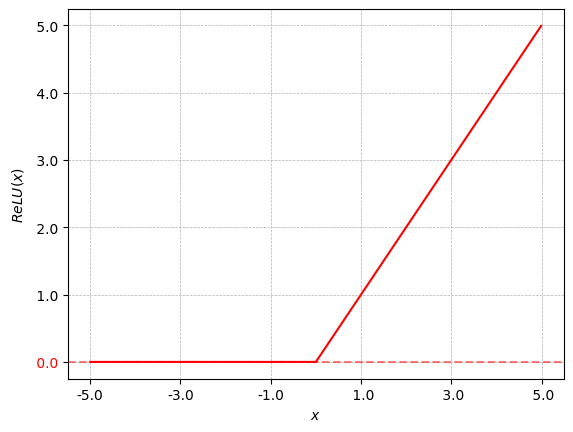

In [115]:
plot_activation_function(keras.activations.sigmoid, r'$\sigma(x)$', y_ticks_step=0.2, radius=5, bottom_line=0, top_line=1)
plot_activation_function(keras.activations.tanh, r'$tanh(x)$', y_ticks_step=0.4, radius=5, bottom_line=-1, top_line=1)
plot_activation_function(keras.activations.relu, r'$ReLU(x)$', y_ticks_step=1.0, radius=5, bottom_line=0, top_line=None)

### 3D

In [79]:
from mpl_toolkits import mplot3d
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

radius = 5
x = np.arange(-radius, radius, 0.01)
y = np.arange(-radius, radius, 0.01)
X, Y = np.meshgrid(x, y)

def set_3Dplot_axies(ax, z_label, z_pos):
    
    ax.set_xlabel('$\Re(z)$', labelpad=10)
    ax.xaxis._axinfo['grid'].update({'linewidth':0.5, 'linestyle':'--'})
    ax.xaxis.set_major_formatter('{x: .1f}')
    x_ticks_step = 2.0
    x_ticks = np.arange(np.min(x), np.max(x)+x_ticks_step, x_ticks_step)
    ax.set_xticks(x_ticks)

    ax.set_ylabel('$\Im(z)$', labelpad=10)
    ax.yaxis._axinfo['grid'].update({'linewidth':0.5, 'linestyle':'--'})
    ax.yaxis.set_major_formatter('{x: .1f}')
    y_ticks_step = 2.0
    y_ticks = np.arange(np.min(y), np.max(y)+y_ticks_step, y_ticks_step)
    ax.set_yticks(y_ticks)
    
    # ax.zaxis.set_rotate_label(False)
    # ax.set_zlabel(z_label, labelpad=-10)
    ax.zaxis._axinfo['grid'].update({'linewidth':0.5, 'linestyle':'--'})
    ax.set_title(z_label, loc='right', y=0.8)
    # ax.text(x=1.1*radius , y=1.1*radius, z=1.2*z_pos, s=z_label)
    # ax.text2D(0.075, 0.06, z_label)
    # ax.set_title(z_label)


In [80]:
def plot_complex_function(Z):

    fig = plt.figure(figsize=(22,22))

    ax = fig.add_subplot(2, 2, 1, projection='3d')
    surf = ax.plot_surface(X, Y, np.abs(Z), cmap = plt.cm.cividis)
    set_3Dplot_axies(ax, '$|g(z)|$', np.max(np.abs(Z)))

    ax = fig.add_subplot(2, 2, 2, projection='3d')
    surf = ax.plot_surface(X, Y, np.angle(Z), cmap = plt.cm.cividis)
    set_3Dplot_axies(ax, '$Arg(g(z))$', np.max(np.angle(Z)))

    ax = fig.add_subplot(2, 2, 3, projection='3d')
    surf = ax.plot_surface(X, Y, np.real(Z), cmap = plt.cm.cividis)
    set_3Dplot_axies(ax, '$\Re(g(z))$', np.max(np.real(Z)))

    ax = fig.add_subplot(2, 2, 4, projection='3d')
    surf = ax.plot_surface(X, Y, np.imag(Z), cmap = plt.cm.cividis)
    set_3Dplot_axies(ax, '$\Im(g(z))$', np.max(np.imag(Z)))


    fig.tight_layout()
    plt.show()

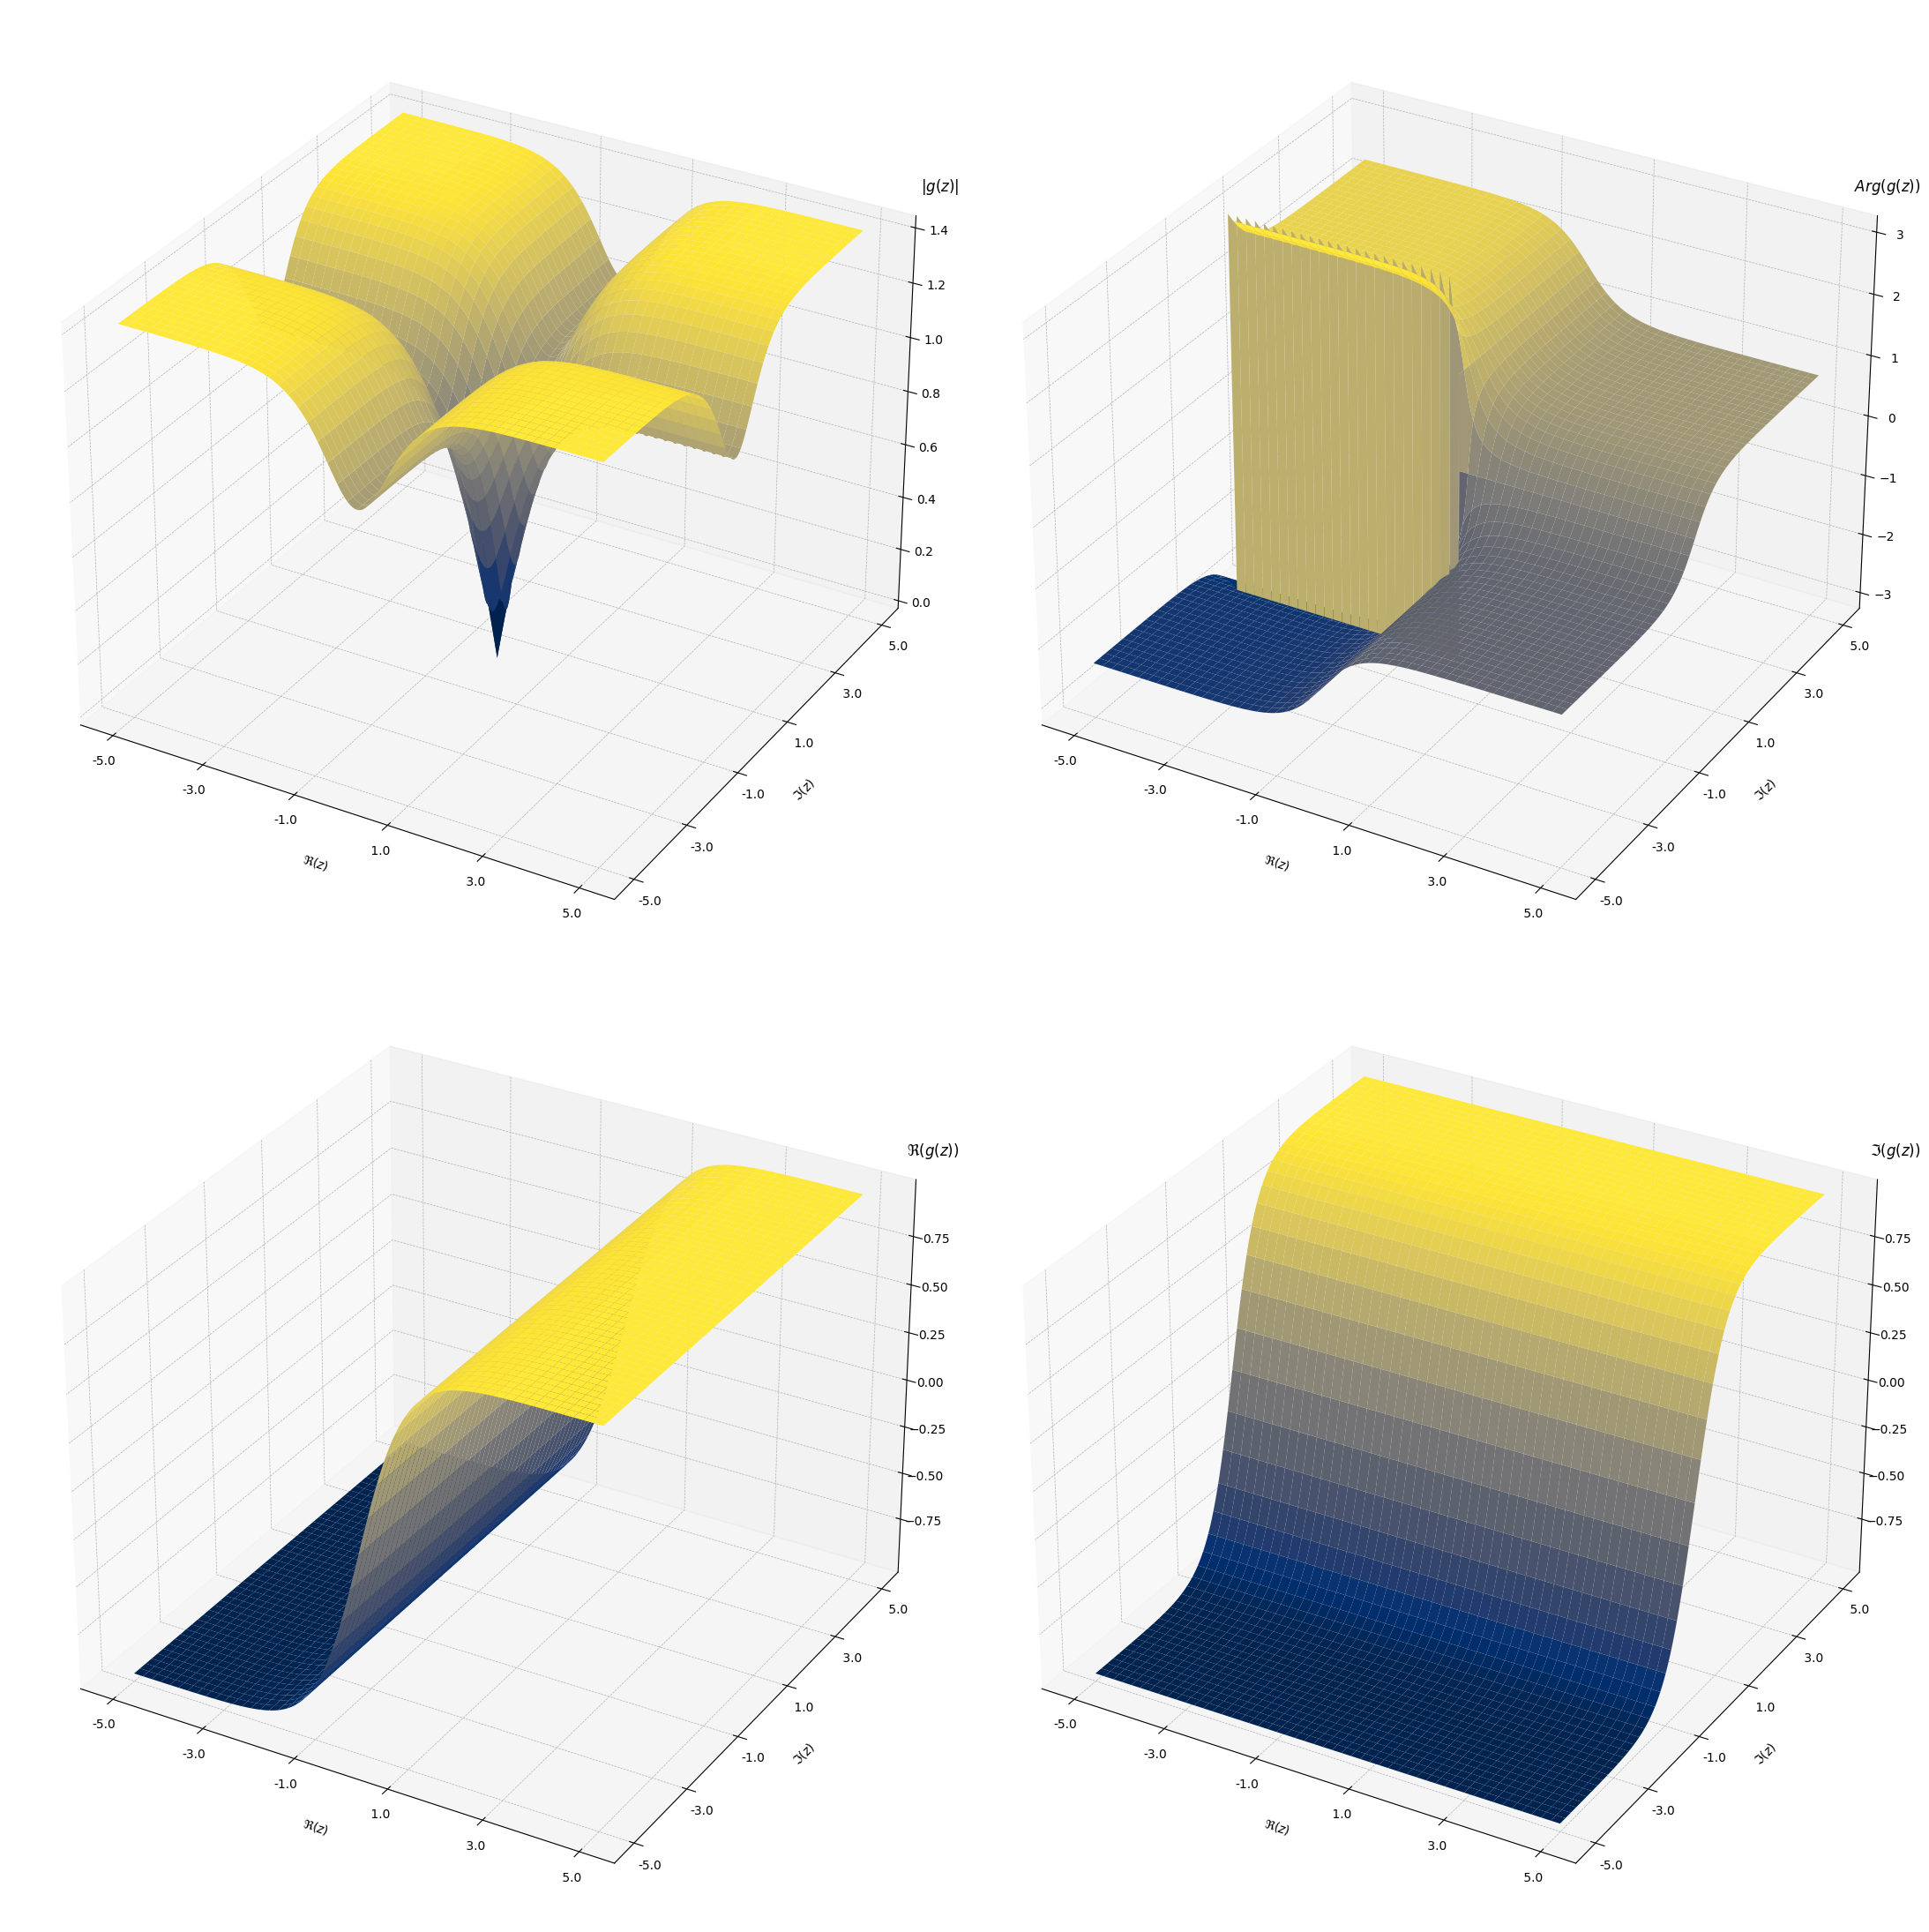

In [81]:
Z = tf.cast(tf.complex(tf.keras.activations.tanh(X), tf.keras.activations.tanh(Y)), dtype=np.complex128)
plot_complex_function(Z)

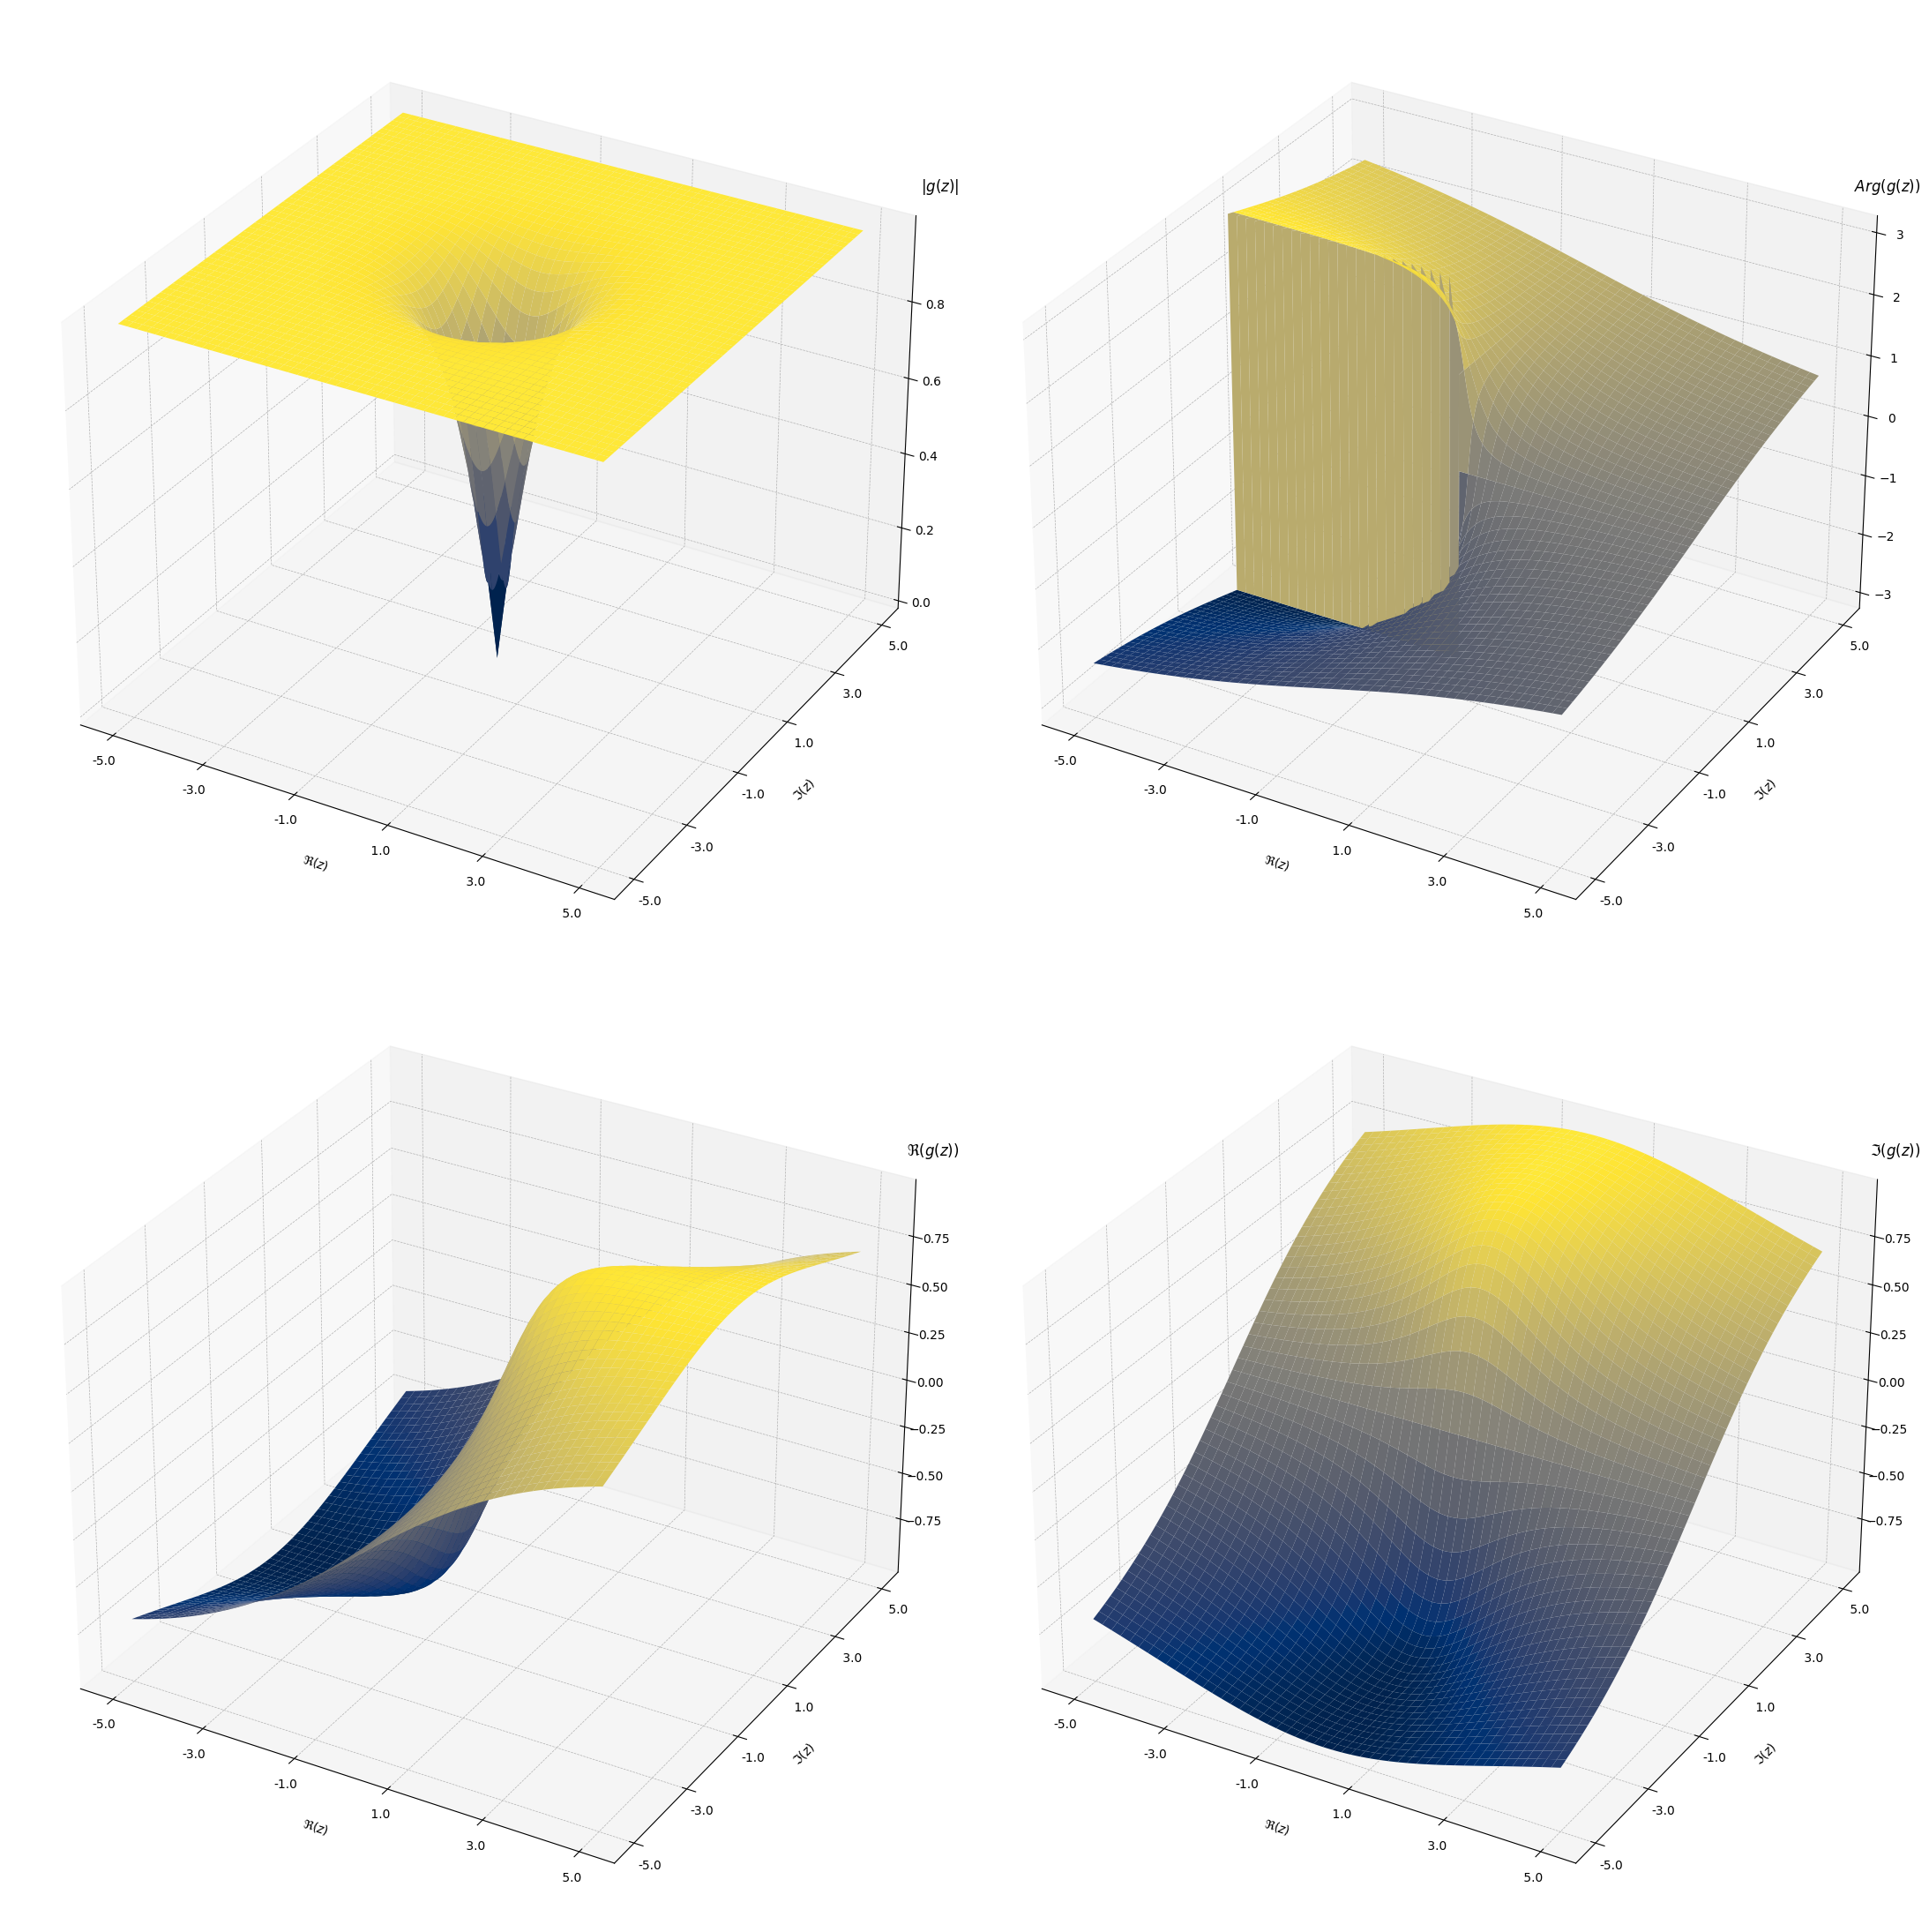

In [116]:
amp = tf.keras.activations.tanh(tf.math.abs(X + 1j*Y))
pha = tf.math.angle(X + 1j*Y)
Z = tf.cast(tf.complex(amp * tf.math.cos(pha), amp * tf.math.sin(pha)), dtype=np.complex128)
plot_complex_function(Z)

In [ ]:
# Z = tf.cast(tf.complex(tf.keras.activations.sigmoid(X), tf.keras.activations.sigmoid(Y)), dtype=np.complex128)
# plot_complex_function(Z)